# KMeans

In [161]:
# Ucitavanje biblioteka

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans
import time
import datetime

In [162]:
# Ucitavanje skupa podataka

data = pd.read_csv('data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
# Eliminisanje instanci sa NaN vrednostima atributa

data = data.dropna()
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [164]:
# Kreiranje nove kolone koja sadrzi datum

data['Date'] = pd.to_datetime(data['Timestamp'], unit='s').dt.date # samo datum (bez vremena)


# Racuanje prosecne vrednosti atributa 'Weighted_Price'

group = data.groupby('Date')
mean_price = group['Weighted_Price'].mean()

In [165]:
# inicijalizacija podataka

data = {'Timestamp': data['Date'].unique(),
        'Price': mean_price}


# kreiranje DataFrame-a i ispis

df = pd.DataFrame(data)
df

,Timestamp,Price
Date,,
2011-12-31,2011-12-31,4.471603
2012-01-01,2012-01-01,4.806667
2012-01-02,2012-01-02,5.000000
2012-01-03,2012-01-03,5.252500
2012-01-04,2012-01-04,5.208159
...,...,...
2021-03-27,2021-03-27,55193.357260
2021-03-28,2021-03-28,55832.958824
2021-03-29,2021-03-29,56913.993819


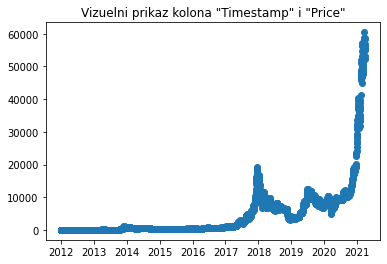

In [166]:
# Vizuelni prikaz kolona 'Timestamp' i 'Price'

plt.title('Vizuelni prikaz kolona "Timestamp" i "Price"')
plt.scatter(df['Timestamp'], df['Price'])
plt.show()

In [167]:
# Prevodjenje izdvojenih (jedinstvenih) datuma u Timestamp

for i in range(df.shape[0]):
    df['Timestamp'][i] = time.mktime(df['Timestamp'][i].timetuple())

<ipython-input-167-21ed2fceb71b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'][i] = time.mktime(df['Timestamp'][i].timetuple())


In [168]:
# Ispis df

df

,Timestamp,Price
Date,,
2011-12-31,1325286000.0,4.471603
2012-01-01,1325372400.0,4.806667
2012-01-02,1325458800.0,5.000000
2012-01-03,1325545200.0,5.252500
2012-01-04,1325631600.0,5.208159
...,...,...
2021-03-27,1616799600.0,55193.357260
2021-03-28,1616886000.0,55832.958824
2021-03-29,1616968800.0,56913.993819


In [169]:
# Priprema skupa podataka za primenu KMeans algoritma

x = df.iloc[:,0:2] # redovi, kolone
x

,Timestamp,Price
Date,,
2011-12-31,1325286000.0,4.471603
2012-01-01,1325372400.0,4.806667
2012-01-02,1325458800.0,5.000000
2012-01-03,1325545200.0,5.252500
2012-01-04,1325631600.0,5.208159
...,...,...
2021-03-27,1616799600.0,55193.357260
2021-03-28,1616886000.0,55832.958824
2021-03-29,1616968800.0,56913.993819


In [170]:
T = df['Timestamp']
P = df['Price']

pairs = []

for a,b in zip(T, P):
    pairs.append((a,b))
    # print(a,b)


# provera

type(pairs[0][0])

float

In [172]:
# Instalacija biblioteke koja omogucava
# odredjivanja optimalnog broja klastera

# pip install yellowbrick

In [173]:
# Elbow Method for K means


# Import ElbowVisualizer

# from yellowbrick.cluster import KElbowVisualizer

# model = KMeans()


# k is range of number of clusters

# visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
# visualizer.fit(pairs)        # Fit data to visualizer
# visualizer.show()        # Finalize and render figure

In [174]:
# K Means

kmeans = KMeans(n_clusters = 4, random_state = 0)
df['cluster'] = kmeans.fit_predict(df[['Timestamp', 'Price']])


# Centroidi

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]


# Dodavanje u df

df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})


# Definicija i mapiranje boja za klastere

colors = ['green', 'blue', 'red', 'yellow']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})

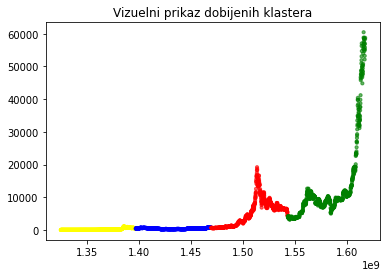

In [175]:
# Vizuelni prikaz dobijenih klastera

plt.title('Vizuelni prikaz dobijenih klastera')
plt.scatter(df.Timestamp, df.Price, c = df.c, alpha = 0.6, s = 10)
plt.show()